In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import os
import numpy as np
import glob

In [2]:
## uni = file name
uni = "SAVER"
# uni = "20230321_dgcnn_type7"
# uni = "20230314_type_6_logcosh_pool_add_aggr_add_ly5_ed10"

path = "/users/yewzzang/work/JSNS2_vertex/result/*" + uni +"*/train.csv"
train_path = glob.glob(path)
train_list = [file for file in train_path if file.endswith(".csv")]

In [3]:
for i in range(len(train_list)):
    print(np.sort(np.array(train_list))[i].split('/')[-2])

20230622_SAVER_test
20230622_SAVER_test2
20230622_SAVER_test_logcosh
20230630_SAVER_weight_loss
20230703_SAVER_weight_loss
20230704_SAVER_weight_loss
20230704_SAVER_weight_loss_seed10345
20230704_SAVER_weight_loss_seed1234
20230704_SAVER_weight_loss_seed2345
20230704_SAVER_weight_loss_seed7345
20230705_SAVER_weight_loss_seed12345
20230710_SAVER_weight_loss_weight2


In [4]:
# d = ['/users/yewzzang/work/JSNS2_vertex/result/20230329_edcn_type5_cla3_l3_mean_max_logcosh/train.csv',

#  '/users/yewzzang/work/JSNS2_vertex/result/20230329_edcn_type5_cla3_l3_add_max_logcosh/train.csv',
#      '/users/yewzzang/work/JSNS2_vertex/result/20230322_edcn_type5_cla3_l3/train.csv',
#      '/users/yewzzang/work/JSNS2_vertex/result/20230622_SAVER_test/train.csv',
#      '/users/yewzzang/work/JSNS2_vertex/result/20230630_weight_loss_test/train.csv',
#  '/users/yewzzang/work/JSNS2_vertex/result/20230630_SAVER_weight_loss/train.csv']

0 Min Train loss = 3.0000025  /  MTL epoch = 3058  /  3.0000242  /  Min Vali loss = 3.0000025  /  MVL epoch = 0271  /  20230704_SAVER_weight_loss_seed1234
1 Min Train loss = 3.0000026  /  MTL epoch = 3553  /  3.0000243  /  Min Vali loss = 3.0000026  /  MVL epoch = 0224  /  20230704_SAVER_weight_loss_seed2345
2 Min Train loss = 3.0003270  /  MTL epoch = 3987  /  3.0055890  /  Min Vali loss = 3.0003270  /  MVL epoch = 0454  /  20230703_SAVER_weight_loss
3 Min Train loss = 0.5831458  /  MTL epoch = 0000  /  0.5793463  /  Min Vali loss = 0.5831458  /  MVL epoch = 0000  /  20230622_SAVER_test2
4 Min Train loss = 0.0036781  /  MTL epoch = 0999  /  0.0055989  /  Min Vali loss = 0.0036781  /  MVL epoch = 0537  /  20230622_SAVER_test
5 Min Train loss = 0.0005329  /  MTL epoch = 3998  /  0.0067282  /  Min Vali loss = 0.0005329  /  MVL epoch = 0439  /  20230630_SAVER_weight_loss
6 Min Train loss = 3.0000025  /  MTL epoch = 3953  /  3.0000249  /  Min Vali loss = 3.0000025  /  MVL epoch = 0266  /  

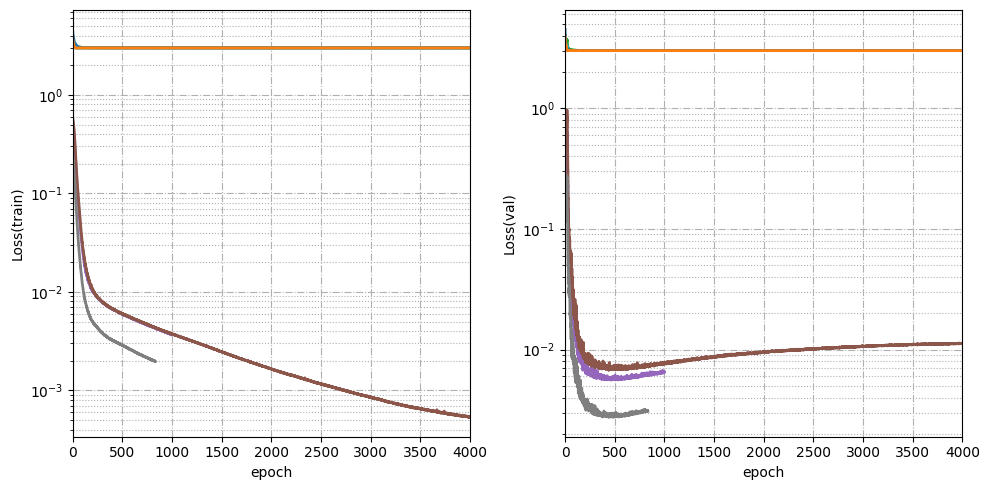

In [5]:
plt.rcParams['figure.figsize'] = (10, 5)
plt.rcParams['lines.linewidth'] = 1
plt.rcParams['lines.markersize'] = 5
plt.rcParams["legend.loc"] = 'upper right'
plt.rcParams["legend.frameon"] = False
plt.rcParams["legend.loc"] = 'upper left'

ax1 = plt.subplot(1, 2, 1, yscale='log', ylabel='Loss(train)', xlabel='epoch')
ax2 = plt.subplot(1, 2, 2, yscale='log', ylabel='Loss(val)', xlabel='epoch')

for ax in (ax1, ax2):
    ax.grid(which='major', axis='both', linestyle='-.')
    ax.grid(which='minor', linestyle=':')
    ax.set_xlim([0,4000])

lines, labels = [], []

for i in range(len(train_list)):
    df = pd.read_csv(train_list[i])

    label = train_list[i]
    l =  ax1.plot(df['loss'], linewidth=2) 
    ax2.plot(df['val_loss'], linewidth=2)
   
    print(i,
          "Min Train loss = " + f"{df['loss'].min():.7f}",
          " / ",
          "MTL epoch = " + str("{:04}".format(np.where(df['loss']==df['loss'].min())[0][0])),
          " / ",
          f"{df['val_loss'].min():.7f}",
          " / ",
          "Min Vali loss = " + f"{df['loss'].min():.7f}",
          " / ",
          "MVL epoch = " + str("{:04}".format(np.where(df['val_loss']==df['val_loss'].min())[0][0])),
          " / ",
          label.split('/')[-2])

    lines.append(l[0])
    labels.append(label)
plt.tight_layout()
# plt.savefig('acc_loss.png',dpi=300)
plt.show()
plt.close()

0 Min Train loss = 3.0000025  /  MTL epoch = 3058  /  3.0000242  /  Min Vali loss = 3.0000025  /  MVL epoch = 0271  /  20230704_SAVER_weight_loss_seed1234
1 Min Train loss = 3.0000026  /  MTL epoch = 3553  /  3.0000243  /  Min Vali loss = 3.0000026  /  MVL epoch = 0224  /  20230704_SAVER_weight_loss_seed2345
2 Min Train loss = 3.0003270  /  MTL epoch = 3987  /  3.0055890  /  Min Vali loss = 3.0003270  /  MVL epoch = 0454  /  20230703_SAVER_weight_loss
3 Min Train loss = 0.5831458  /  MTL epoch = 0000  /  0.5793463  /  Min Vali loss = 0.5831458  /  MVL epoch = 0000  /  20230622_SAVER_test2
4 Min Train loss = 0.0036781  /  MTL epoch = 0999  /  0.0055989  /  Min Vali loss = 0.0036781  /  MVL epoch = 0537  /  20230622_SAVER_test
5 Min Train loss = 0.0005329  /  MTL epoch = 3998  /  0.0067282  /  Min Vali loss = 0.0005329  /  MVL epoch = 0439  /  20230630_SAVER_weight_loss
6 Min Train loss = 3.0000025  /  MTL epoch = 3953  /  3.0000249  /  Min Vali loss = 3.0000025  /  MVL epoch = 0266  /  

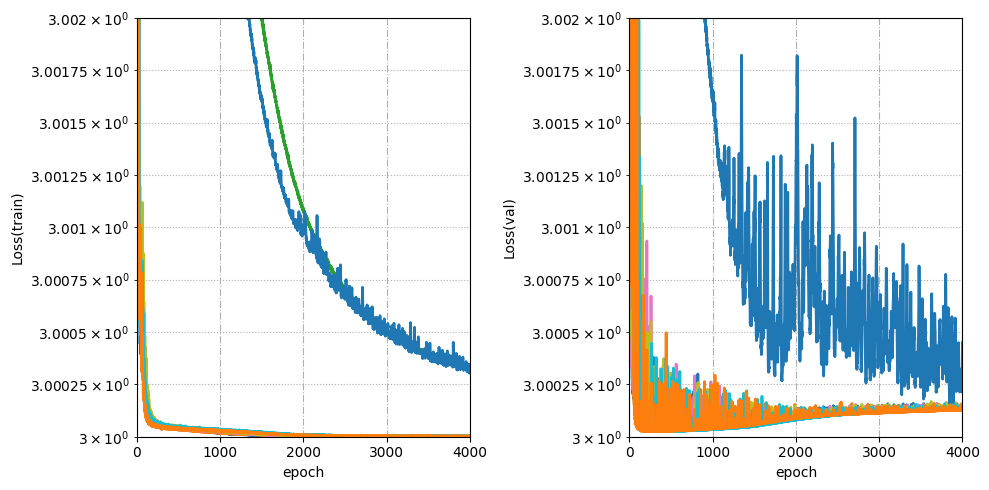

In [6]:
#### for weight training model loss
#### y range 3~ 3.002

plt.rcParams['figure.figsize'] = (10, 5)
plt.rcParams['lines.linewidth'] = 1
plt.rcParams['lines.markersize'] = 5
plt.rcParams["legend.loc"] = 'upper right'
plt.rcParams["legend.frameon"] = False
plt.rcParams["legend.loc"] = 'upper left'

ax1 = plt.subplot(1, 2, 1, yscale='log', ylabel='Loss(train)', xlabel='epoch')
ax2 = plt.subplot(1, 2, 2, yscale='log', ylabel='Loss(val)', xlabel='epoch')

for ax in (ax1, ax2):
    ax.grid(which='major', axis='both', linestyle='-.')
    ax.grid(which='minor', linestyle=':')
    ax.set_xlim([0,4000])
    ax.set_ylim([3,3.002])
lines, labels = [], []

for i in range(len(train_list)):
    df = pd.read_csv(train_list[i])

    label = train_list[i]
    l =  ax1.plot(df['loss'], linewidth=2) 
    ax2.plot(df['val_loss'], linewidth=2)
   
    print(i,
          "Min Train loss = " + f"{df['loss'].min():.7f}",
          " / ",
          "MTL epoch = " + str("{:04}".format(np.where(df['loss']==df['loss'].min())[0][0])),
          " / ",
          f"{df['val_loss'].min():.7f}",
          " / ",
          "Min Vali loss = " + f"{df['loss'].min():.7f}",
          " / ",
          "MVL epoch = " + str("{:04}".format(np.where(df['val_loss']==df['val_loss'].min())[0][0])),
          " / ",
          label.split('/')[-2])

    lines.append(l[0])
    labels.append(label)
plt.tight_layout()
# plt.savefig('acc_loss.png',dpi=300)
plt.show()
plt.close()


In [7]:
## for one clear plot

# plt.rcParams['figure.figsize'] = (5, 5)
# plt.rcParams['lines.linewidth'] = 1
# plt.rcParams['lines.markersize'] = 5
# plt.rcParams["legend.loc"] = 'upper right'
# plt.rcParams["legend.frameon"] = False
# plt.rcParams["legend.loc"] = 'upper left'


# df = pd.read_csv(train_list[i])

# plt.plot(df['loss'], linewidth=2) 
# plt.grid(which='major', axis='both', linestyle='-.')
# plt.grid(which='minor', linestyle=':')
# plt.xlim([0,3000])
# plt.yscale('log')
# plt.xlabel('Epoch',loc='right',fontsize=15)
# plt.ylabel('Training Loss',loc='top',fontsize=15)
# plt.tight_layout()
# plt.show()


# plt.rcParams['figure.figsize'] = (5, 5)



# df = pd.read_csv(train_list[i])

# plt.plot(df['val_loss'], linewidth=2)

# plt.grid(which='major', axis='both', linestyle='-.')
# plt.grid(which='minor', linestyle=':')
# plt.xlim([0,3000])
# plt.yscale('log')
# plt.xlabel('Epoch',loc='right',fontsize=15)
# plt.ylabel('Validation Loss',loc='top',fontsize=15)
# plt.tight_layout()
# plt.show()




    
